**Import and calculate power spectral densities across wind speeds**

In [5]:
!pip install matplotlib
!pip install librosa

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import librosa as librosa

import scipy.signal as signal

# WINDTUNNEL_TESTING_PATH = '/content/drive/MyDrive/windtunnel_testing/'
# AUDIO_SAMPLED_AUDIO_PATH = 'recordings/mems_smallfilter_bellapc/wav_0.wav'
# AUDIO_SWEEP_PATH = 'injected_sounds/basic-sine-riser-71661.mp3'

In [15]:
LENGTH_OF_EXPERIMENT_SECONDS = 20.0 * 60.0 # 20 MINUTES

WINDTUNNEL_TESTING_PATH = '../'

PATH_NOFILTER = WINDTUNNEL_TESTING_PATH + 'recordings/mems_nofilter_bellapc/'
PATH_SMALLFILTER = WINDTUNNEL_TESTING_PATH + 'recordings/mems_smallfilter_bellapc/'

PATH_TESTS = [PATH_NOFILTER,PATH_SMALLFILTER]
LABELS = ["No Filter","Small Mesh Dome"]

AUDIO_SAMPLED_CLIP = 'wav_0.wav'
AUDIO_SWEEP_CLIP = 'injected_sounds/basic-sine-riser-71661.mp3'

**Import and look at PSD over wind speeds and no injected sounds**

In [82]:
from matplotlib.ticker import StrMethodFormatter


def plot_across_wind(speed = '4', save_path=""):
    
    min_dB = -140
    max_dB = -20

    from matplotlib.ticker import StrMethodFormatter

    plt.figure(figsize=(12, 4), dpi=400)
    ax = fig.add_subplot(111)

    # Create a figure object with two subplots
    # fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

    psd_wind_only = []

    for path, label in zip(PATH_TESTS,LABELS):
        wind_speed = speed #m/s
        file_name = wind_speed + '_m_s_wind_only.wav'

        print("importing path: " + path + 'wind_only/' + file_name)
        wind_sample, wind_sample_rate = librosa.load(path + 'wind_only/' + file_name,sr=None)

        f1, Pxx1 = signal.welch(wind_sample, wind_sample_rate, nperseg=256, noverlap=128, window='hann')
        Pxx1_dB = 10 * np.log10(Pxx1)

        plt.loglog(f1, Pxx1_dB, label=label)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (dB/Hz)')
    plt.yscale('symlog')
    plt.ylim(-140,-40) # Set the x-axis limits
    plt.xlim(right=20000) # Set the x-axis limits
    # Set the y-axis ticks in 10 dB increments
    plt.yticks(np.arange(min_dB, max_dB, 10))
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
    if(wind_speed=="3_17"):
        plt.title("Wind Speed: " + "3.17" + "m/s")
    else:
        plt.title("Wind Speed: " + wind_speed + "m/s")
    plt.legend()
    plt.grid()
    plt.show()   

importing path: ../recordings/mems_nofilter_bellapc/wind_only/4_m_s_wind_only.wav
importing path: ../recordings/mems_smallfilter_bellapc/wind_only/4_m_s_wind_only.wav


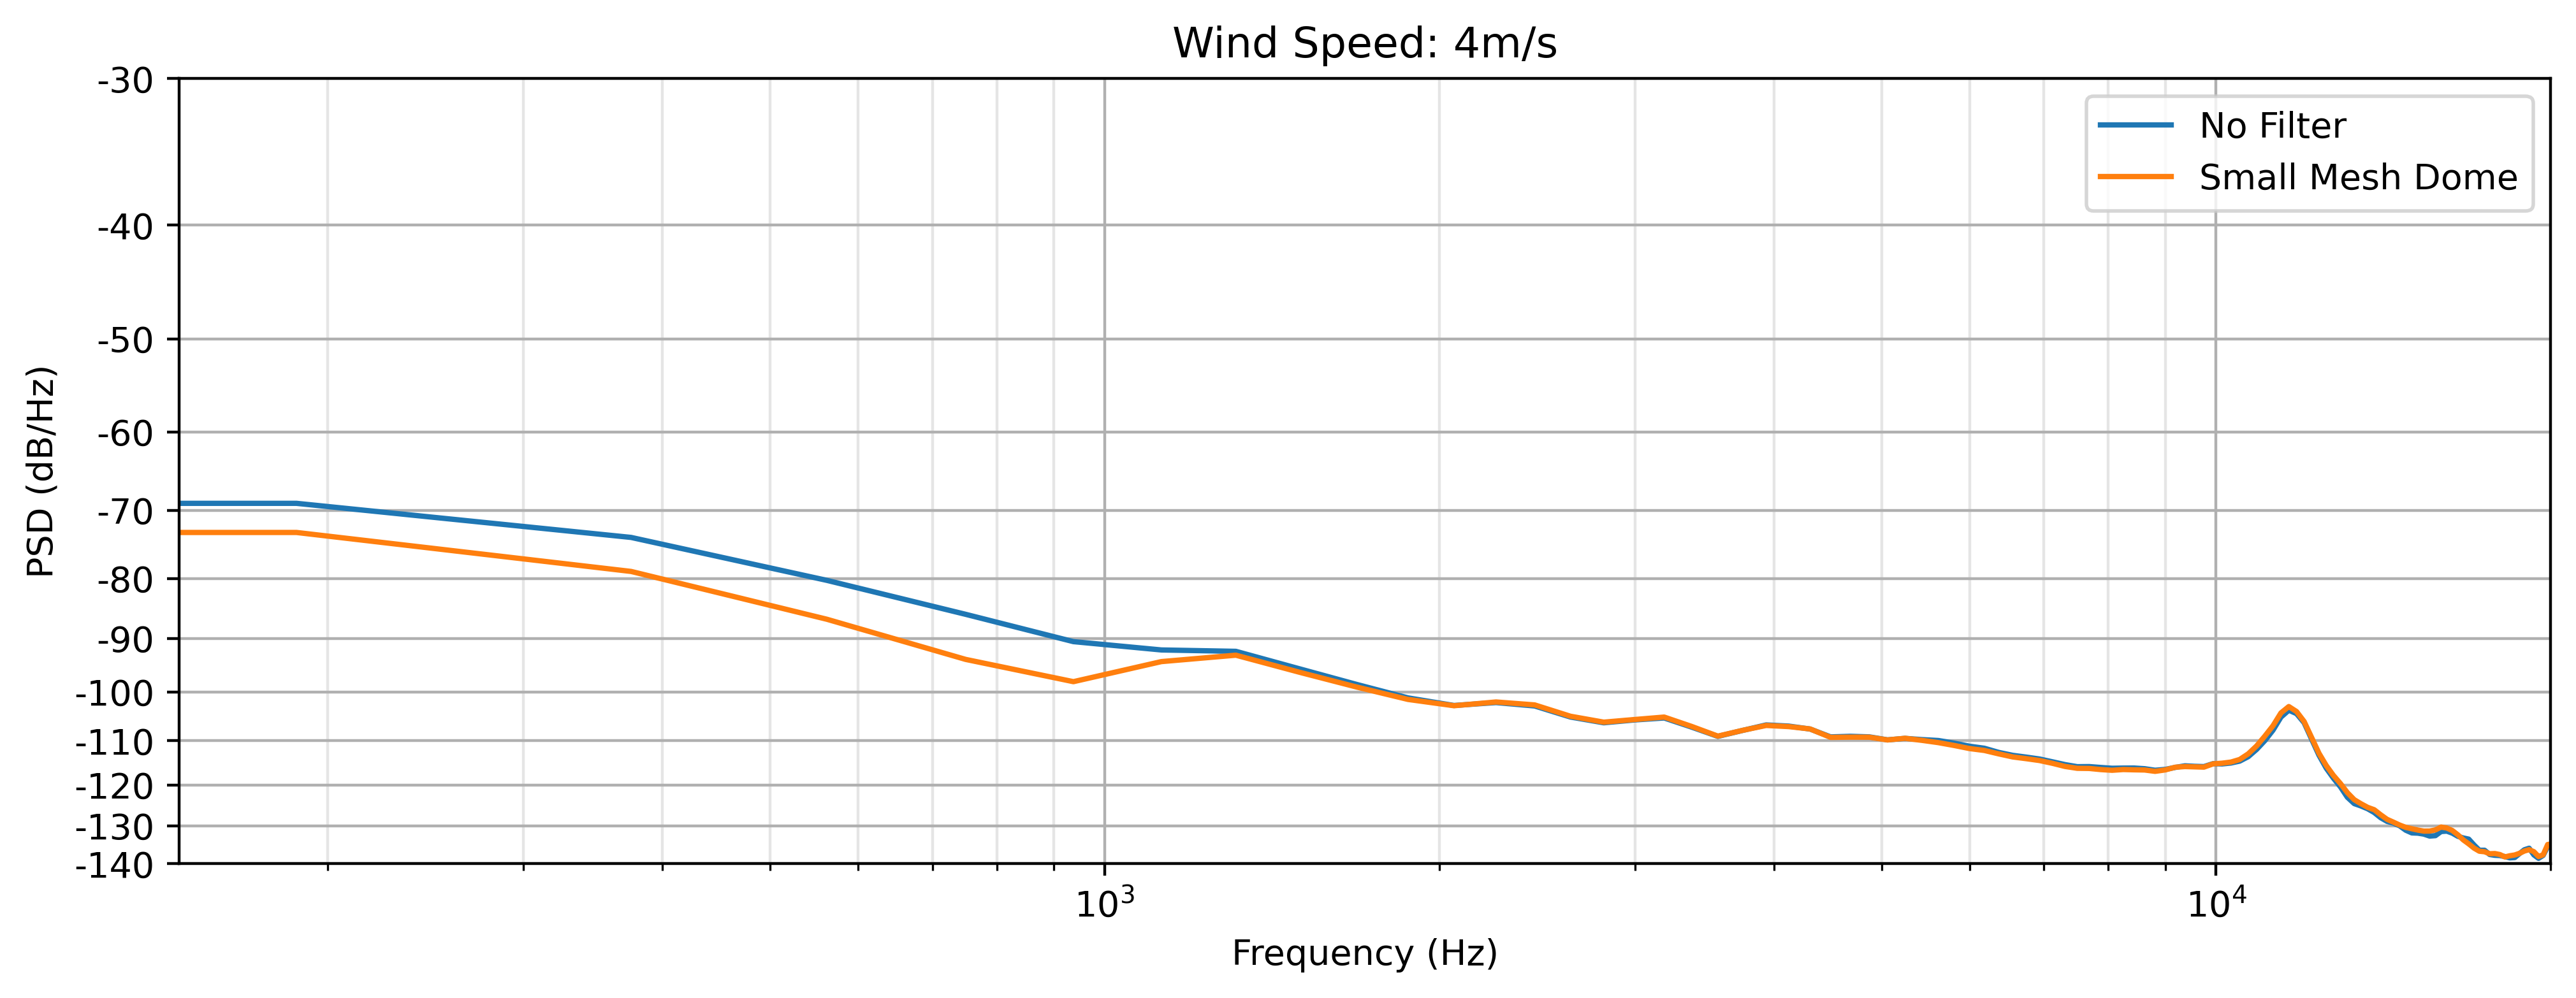

In [79]:
plot_across_wind('4')

importing path: ../recordings/mems_nofilter_bellapc/wind_only/10_m_s_wind_only.wav
importing path: ../recordings/mems_smallfilter_bellapc/wind_only/10_m_s_wind_only.wav


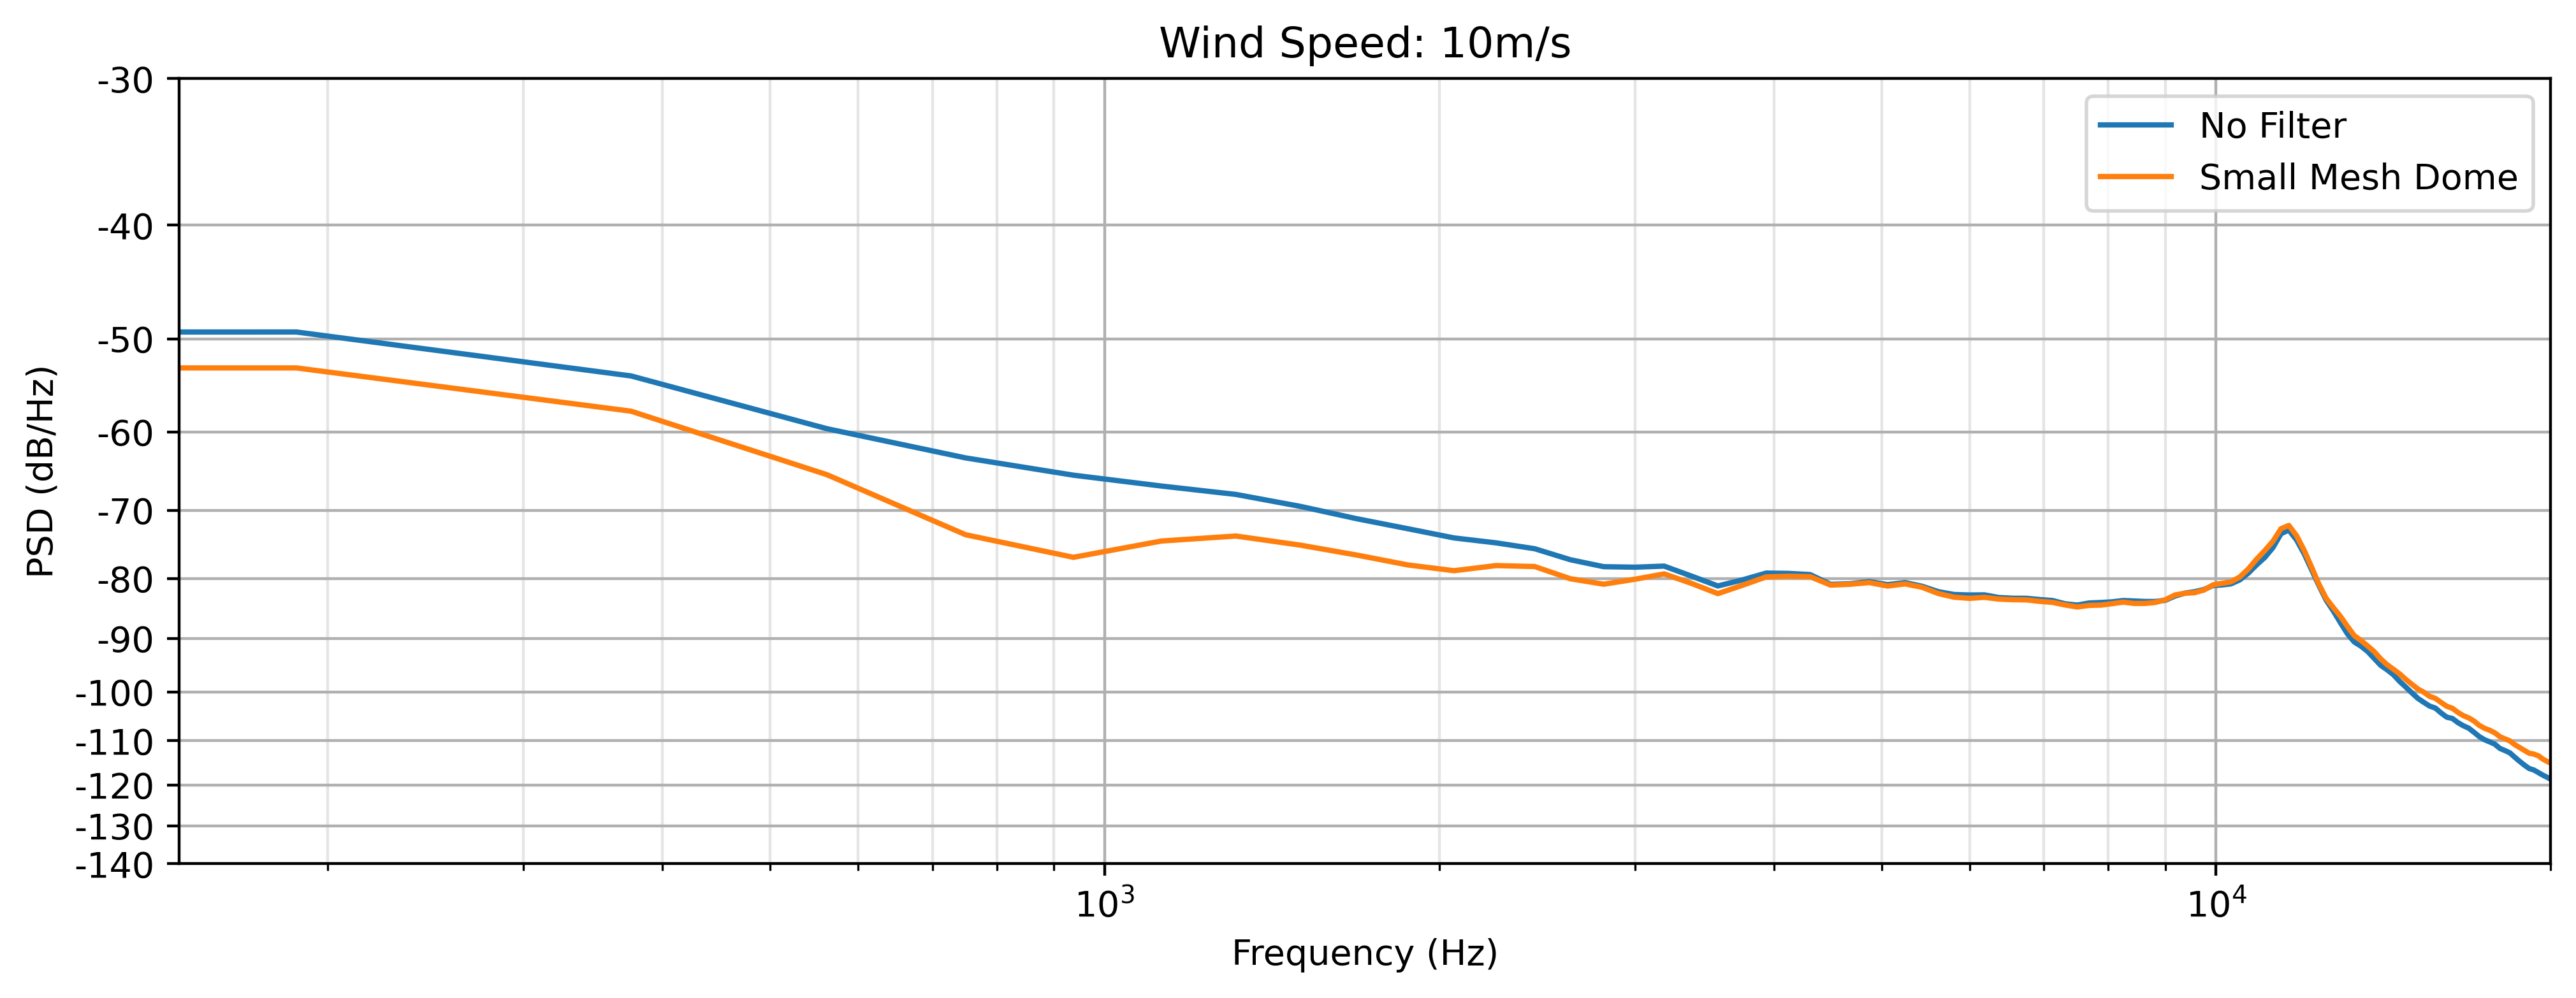

In [80]:
plot_across_wind('10')

importing path: ../recordings/mems_nofilter_bellapc/wind_only/3_17_m_s_wind_only.wav
importing path: ../recordings/mems_smallfilter_bellapc/wind_only/3_17_m_s_wind_only.wav


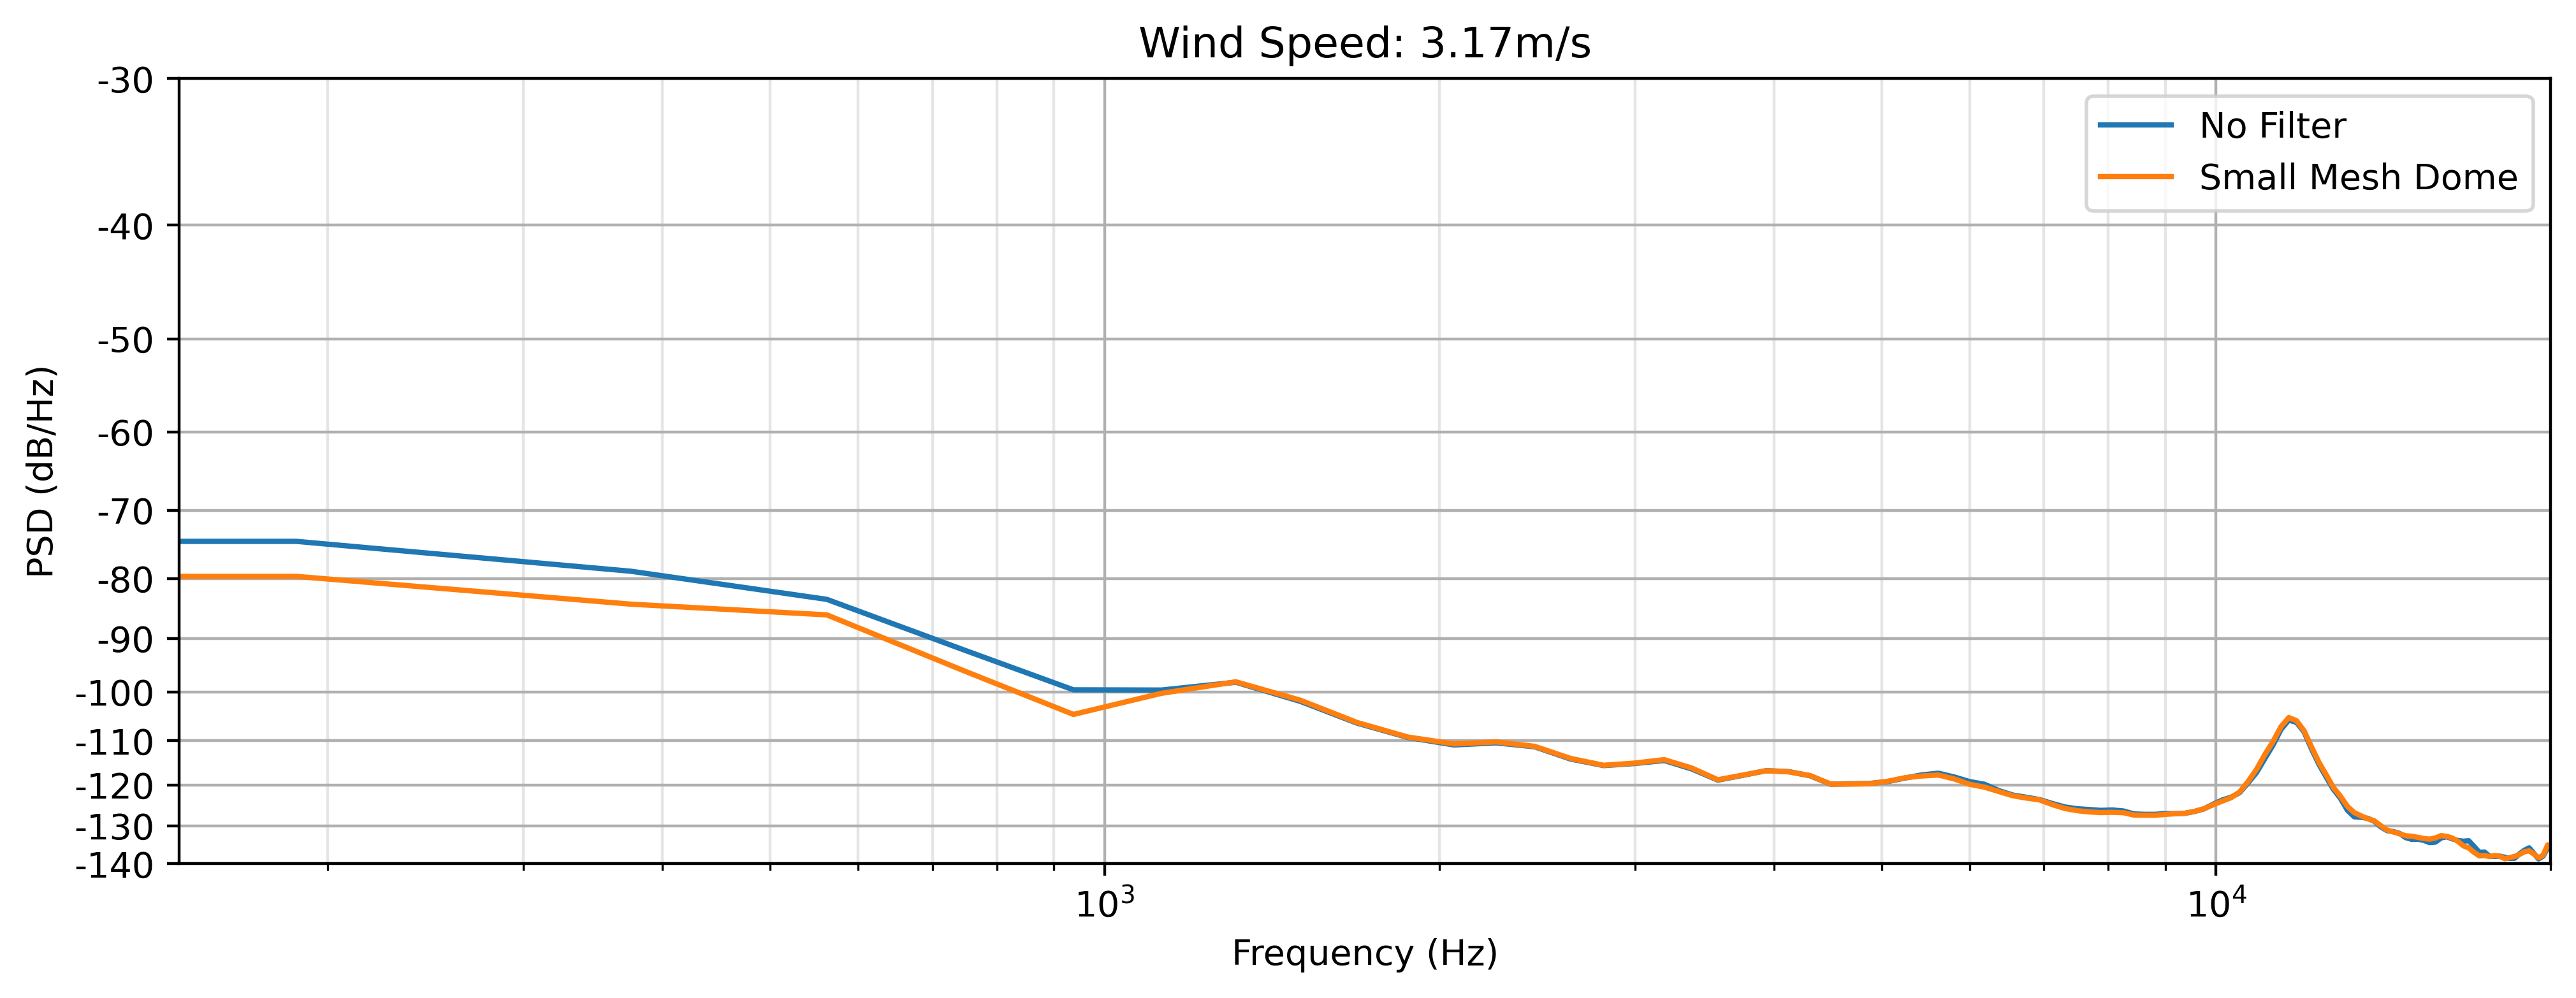

In [83]:
plot_across_wind('3_17')

importing path: ../recordings/mems_nofilter_bellapc/wind_only/4_m_s_wind_only.wav
importing path: ../recordings/mems_smallfilter_bellapc/wind_only/4_m_s_wind_only.wav


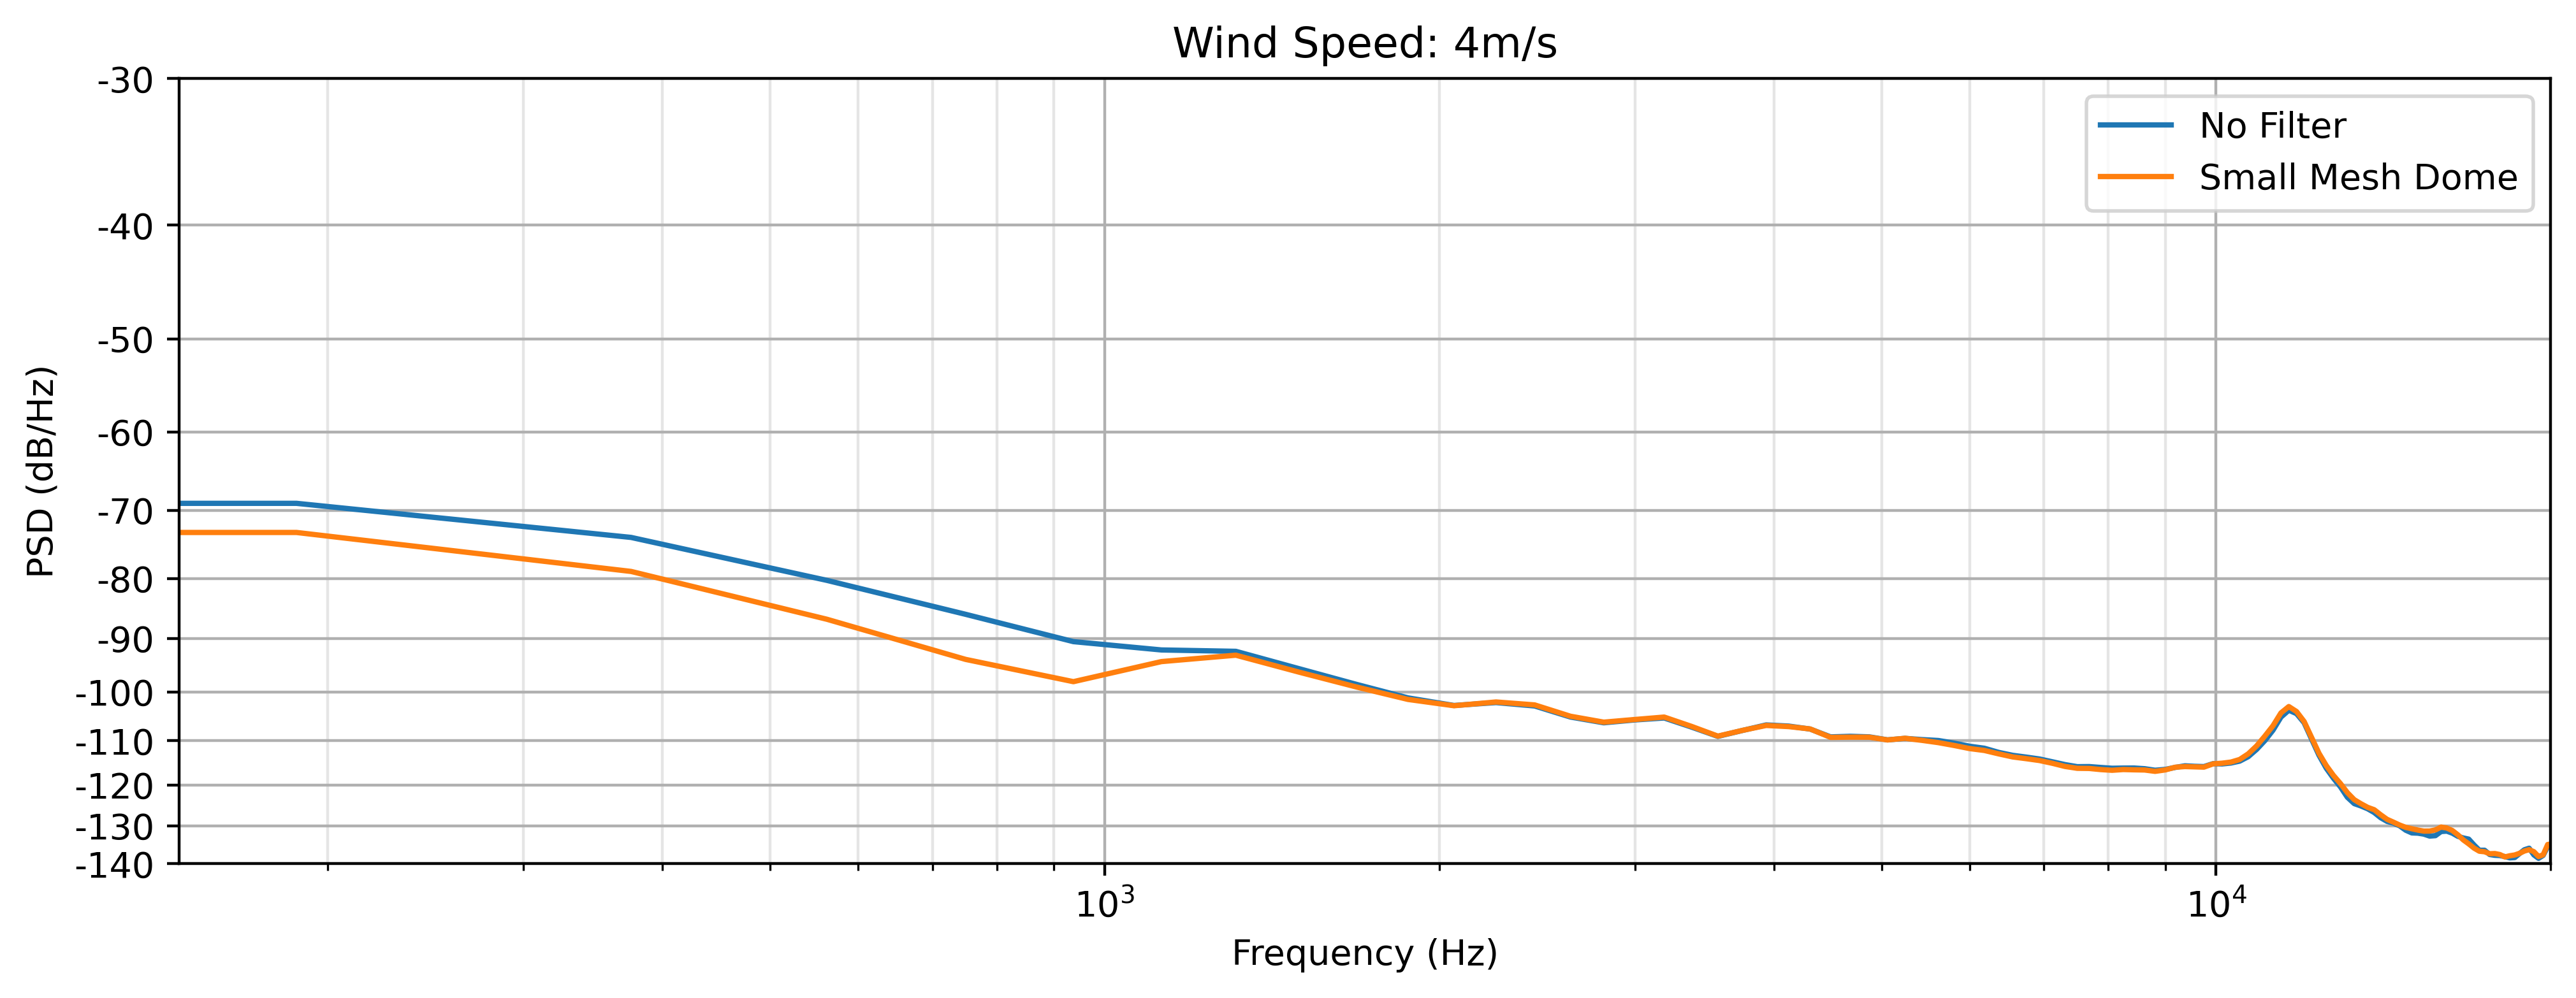

In [72]:
min_dB = -140
max_dB = -20

from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(12, 4), dpi=400)
ax = fig.add_subplot(111)

# Create a figure object with two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

psd_wind_only = []

for path, label in zip(PATH_TESTS,LABELS):
    wind_speed = '4' #m/s
    file_name = wind_speed + '_m_s_wind_only.wav'
    
    print("importing path: " + path + 'wind_only/' + file_name)
    wind_sample, wind_sample_rate = librosa.load(path + 'wind_only/' + file_name,sr=None)
    
    f1, Pxx1 = signal.welch(wind_sample, wind_sample_rate, nperseg=256, noverlap=128, window='hann')
    Pxx1_dB = 10 * np.log10(Pxx1)
    
    plt.loglog(f1, Pxx1_dB, label=label)

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.yscale('symlog')
plt.ylim(-140,-40) # Set the x-axis limits
plt.xlim(right=20000) # Set the x-axis limits
# Set the y-axis ticks in 10 dB increments
plt.yticks(np.arange(min_dB, max_dB, 10))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.title("Wind Speed: " + wind_speed + "m/s")
plt.legend()
plt.grid()
plt.show()    


plots
(1) between experiments
    (1.1) different wind speeds
(2) show the response differences with no wind with white noise
